In [394]:
"""
CREATING MULTIPLEX NETWORKS AND FORMATTING FOR MULTIVERSE

FOR FIRST AND THIRD LAYER OF AMINER DATA
"""

'\nCREATING MULTIPLEX NETWORKS AND FORMATTING FOR MULTIVERSE\n\nCURRENTLY ONLY FOR SECOND LAYER OF AMINER DATA (899 x 899)\n'

In [1]:
import numpy as np
from scipy.io import loadmat

In [379]:
"""
LAYER A1 FORMATTING FOR PROPER MULTIVERSE INPUT
"""

''

In [2]:
aminer = loadmat('AminerData_v6.mat')
aminer.keys()

dict_keys(['__header__', '__version__', '__globals__', 'DO', 'DU', 'G', 'G_new'])

In [3]:
A1 = aminer['G'][0,0][0][0][0] # import original AminerData, A2.csv (2nd layer)
A2 = aminer['G'][0,1][0][0][0]
A3 = aminer['G'][0,2][0][0][0]

In [4]:
A1[0].shape  # representation of first node

(1, 62602)

In [5]:
A2[0].shape

(1, 899)

In [6]:
A3[0].shape

(1, 61843)

In [7]:
A1_edges = np.transpose(np.nonzero(A1))  # edgelist format (source node, target node)
A2_edges = np.transpose(np.nonzero(A2))
A3_edges = np.transpose(np.nonzero(A3))
A1_edges.shape, A2_edges.shape, A3_edges.shape # these edges are double counted (1,2) and (2,1) are counted separately

((21487, 2), (4814, 2), (402074, 2))

In [8]:
type(A1_edges), type(A2_edges), type(A3_edges)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [9]:
"""
edgelist format for MultiVERSE:
(layer, source, target, weight)
"""
def edgelist_format(edges, weight=1, save_as_txt=False, file_name=None):
    """
    edges:       (nx2) within layer edges
    save_as_txt: if True saves edge as .txt file
    file_name:   name of .txt file
    
    Takes in edges and adds layer_num and weight to format into 
    (layer_num, start node, finish node, weight)
    as a numpy array
    
    e.g.
    1,2,3,1
    layer 1, edge from node 2 to 3, weight 1
    """
    iter = 0
    new_edges = []
    for row in edges:
        row = np.insert(row, 0, 1)
        row = list(np.insert(row, 3, weight))
        new_edges.append(row)
        iter += 1
    new_edges = np.asarray(new_edges)
    
    # save as input .txt file for MultiVERSE
    if save_as_txt:
        if file_name:
            np.savetxt(file_name+'.txt', new_edges, fmt='%d', delimiter=' ')
    return new_edges


# iter = 0
# A2_new_edges = []
# for row in A2_edges:
#     row = np.insert(row, 0, 1)        # insert 1 in beginning for layer
#     row = list(np.insert(row, 3, 1))  # insert 1 in end for weight
#     A2_new_edges.append(row)
#     iter += 1

# A2_new_edges = np.asarray(A2_new_edges)
# A2_new_edges.shape

In [10]:
A1_edges = edgelist_format(A1_edges, save_as_txt=True, file_name='A1_edges')
A2_edges = edgelist_format(A2_edges, save_as_txt=True, file_name='A2_edges')
A3_edges = edgelist_format(A3_edges, save_as_txt=True, file_name='A3_edges')

A1_edges.shape, A2_edges.shape, A3_edges.shape

((21487, 4), (4814, 4), (402074, 4))

In [11]:
A2_edges[:10]  # sanity check

array([[  1,   1,  22,   1],
       [  1,   1,  29,   1],
       [  1,   1,  48,   1],
       [  1,   1,  49,   1],
       [  1,   1,  57,   1],
       [  1,   1,  79,   1],
       [  1,   1,  86,   1],
       [  1,   1,  96,   1],
       [  1,   1, 100,   1],
       [  1,   1, 115,   1]], dtype=int32)

In [ ]:
"""
LAYER B2 FORMATTING FOR PROPER MULTIVERSE INPUT
"""

In [18]:
cd ..

/Users/taikannakada/FASCINATE


In [ ]:
# loading cosine similarity matrix for 2nd layer of AminerData
B1 = np.load('cosine_matrices/B1.npz')
B2 = np.load('cosine_matrices/B2.npz')
B3 = np.load('cosine_matrices/B3.npz')
B1['F1'].shape, B2['F2'].shape, B3['F3'].shape

In [403]:
type(B2['F2'])

numpy.ndarray

In [404]:
B2['F2'][0:1,:].shape  #representation of the first node

(1, 899)

In [405]:
similarity = []
for row in B2['F2']:
    for each in row:
        if 0 < np.round(each, decimals=2) < 1:
            similarity.append(each)

In [406]:
similarity = np.asarray(similarity)
len(similarity)

315362

Cosine Similarities between 0.05 < sim < .995

min: 0.005000523332264318
max: 0.9949795704456791
mean: 0.07534895776762207
median: 0.02753670312528149
STD: 0.13684700254448334
97.5th %ile: 0.34904296285658876
Num. edges: 13528


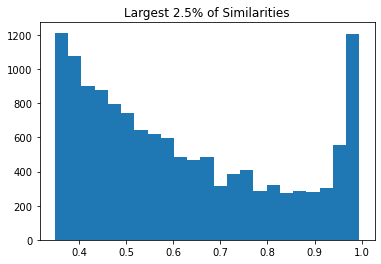

In [426]:
print("Cosine Similarities between 0.05 < sim < .995")
print("")
print("min:",np.min(similarity))
print("max:",np.max(similarity))
print("mean:",np.mean(similarity))
print("median:", np.median(similarity))
print("STD:", np.std(similarity))
print("97.5th %ile:", np.mean(similarity) + 2*np.std(similarity))

threshold = np.mean(similarity) + np.std(similarity)
print("Num. edges:", len(similarity[similarity > np.mean(similarity) + 2*np.std(similarity)]))

plt.hist(similarity[similarity > np.mean(similarity) + 2*np.std(similarity)], bins='auto')
plt.title("Largest 2.5% of Similarities")
plt.plot()
plt.show()

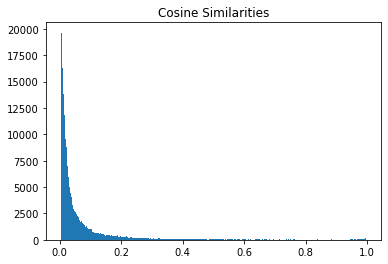

In [423]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(similarity, bins='auto')
plt.title("Cosine Similarities")
plt.plot()
plt.show()

Cosine Similarities between 0 < sim < 1

mean: 0.03261213018387313
median: 0.00046364493995302257
STD: 0.10680705165581651
97.5th %ile: 0.13941918183968965
Number of edges: 23532


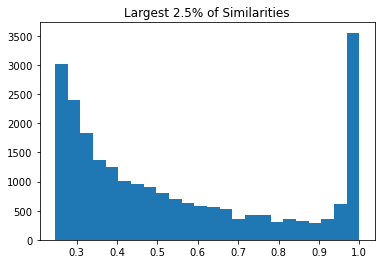

In [409]:
print("Cosine Similarities between 0 < sim < 1")
print("")
print("mean:", np.mean(B2['F2']))
print("median:", np.median(B2['F2']))
print("STD:", np.std(B2['F2']))
print("97.5th %ile:", np.mean(B2['F2']) + np.std(B2['F2']))
print("Number of edges:", len(B2['F2'][B2['F2'] > np.mean(B2['F2']) + 2*np.std(B2['F2'])]))

plt.hist(B2['F2'][B2['F2'] > np.mean(B2['F2']) + 2*np.std(B2['F2'])], bins='auto')
plt.title('Largest 2.5% of Similarities')
plt.plot()
plt.show()

In [410]:
threshold  # cosine similarities above this value will be an edge between the nodes

0.2121959603121054

In [411]:
# edges (matrix indices) for node similarity above threshold value
B2_edges = np.transpose(np.where(B2['F2'] > threshold)) 
type(B2_edges)

numpy.ndarray

In [412]:
"""
edgelist format for MultiVERSE:
(layer, source, target, weight)
"""

iter = 0
B2_new_edges = []
for row in B2_edges:
    row = np.insert(row, 0, 2)
    row = list(np.insert(row, 3, 1))
    B2_new_edges.append(row)
    iter += 1

B2_new_edges = np.asarray(B2_new_edges)
B2_new_edges.shape

(27928, 4)

In [414]:
B2_new_edges[:20]  # sanity check

array([[  2,   1,   1,   1],
       [  2,   1, 249,   1],
       [  2,   1, 298,   1],
       [  2,   1, 450,   1],
       [  2,   1, 543,   1],
       [  2,   1, 552,   1],
       [  2,   1, 553,   1],
       [  2,   1, 656,   1],
       [  2,   1, 712,   1],
       [  2,   1, 728,   1],
       [  2,   2,   2,   1],
       [  2,   2,   8,   1],
       [  2,   2,  39,   1],
       [  2,   2,  43,   1],
       [  2,   2,  72,   1],
       [  2,   2,  84,   1],
       [  2,   2,  89,   1],
       [  2,   2,  95,   1],
       [  2,   2,  97,   1],
       [  2,   2, 150,   1]])

In [415]:
np.savetxt('B2_edges.txt', B2_new_edges, fmt='%d', delimiter=' ')  # save as input .txt file for MultiVERSE

In [417]:
layer2_multiplex_edges = np.vstack((A2_new_edges, B2_new_edges))
layer2_multiplex_edges.shape

(32742, 4)

In [418]:
layer2_multiplex_edges

array([[  1,   1,  22,   1],
       [  1,   1,  29,   1],
       [  1,   1,  48,   1],
       ...,
       [  2, 898, 445,   1],
       [  2, 898, 889,   1],
       [  2, 898, 898,   1]])

In [419]:
np.savetxt('Aminer_layer2_multiplex_edges.txt', layer2_multiplex_edges, fmt='%d', delimiter=' ')  # save as input .txt file for MultiVERSE